In [5]:
#Importaciones
import sys
import os
# Añadir la ruta de 'src' para poder importar nuestros módulos
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import numpy as np
import tensorflow as tf
from utils import data_loader
from models.baseline import model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [7]:
#Cargar los Datos

# Ruta raíz donde están todas las carpetas de gestos
DATA_PATH = "../data/processed"

# Opcional: mostrar las carpetas de gestos detectadas
gesture_folders = [os.path.basename(f) for f in glob.glob(os.path.join(DATA_PATH, '*')) if os.path.isdir(f)]
print("Gestos encontrados:", gesture_folders)

SEQUENCE_LENGTH = 30
X_train, X_test, y_train, y_test = data_loader.load_gesture_data(DATA_PATH, max_len=SEQUENCE_LENGTH)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

Gestos encontrados: ['mano_abierta', 'pulgar', 'v']
Loading data from: ../data/processed
Found subdirectories: ['../data/processed\\mano_abierta', '../data/processed\\pulgar', '../data/processed\\v']
Found 16 json files in ../data/processed\mano_abierta
Frame 0 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 1 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 2 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 3 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 4 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 5 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 6 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 8 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 96 in ../dat

In [8]:
#Construir y Entrenar el Modelo
NUM_CLASSES = len(data_loader.GESTURE_MAP)
input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = model.build_lstm_model(input_shape, NUM_CLASSES)
lstm_model.summary()

history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,019 (554.76 KB)

 Trainable params: 142,019 (554.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.3243 - loss: 1.0964 - val_accuracy: 0.3000 - val_loss: 1.0910
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3514 - loss: 1.0768 - val_accuracy: 0.5000 - val_loss: 1.1063
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7027 - loss: 1.0458 - val_accuracy: 0.3000 - val_loss: 1.0126
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3514 - loss: 0.9668 - val_accuracy: 0.3000 - val_loss: 0.9291
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5135 - loss: 0.9020 - val_accuracy: 0.5000 - val_loss: 0.7226
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6486 - loss: 0.8346 - val_accuracy: 0.5000 - val_loss: 0.7009
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6216 - loss: 0.8045 - val_accuracy: 1.0000 - val_loss: 0.4800
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7297 - loss: 0.6338 - val_accuracy: 0.5000 - val_loss: 0.5446

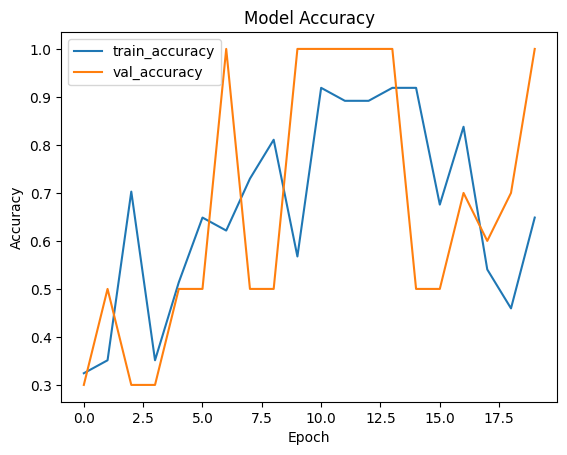

In [9]:
# Graficar la pérdida y la precisión del entrenamiento
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

mano_abierta       1.00      1.00      1.00         2
      pulgar       1.00      1.00      1.00         5
           v       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Matriz de Confusión:


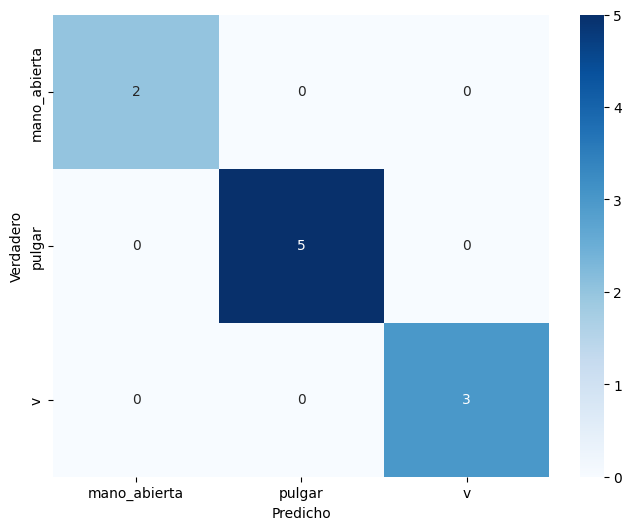

In [10]:
#Reporte de Clasificación y Matriz de Confusión
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
# Convertir y_test de one-hot a etiquetas de clase si es necesario
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test
gesture_names = list(data_loader.GESTURE_MAP.keys())
labels = list(range(len(gesture_names)))

print("\nReporte de Clasificación:")
print(classification_report(y_test_labels, y_pred, labels=labels, target_names=gesture_names, zero_division=0))

print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test_labels, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gesture_names, yticklabels=gesture_names, cmap='Blues')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()